In [1]:
from datetime import datetime
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

# %matplotlib widget
%matplotlib inline

In [2]:
# time_of_system_query = "2025-02-19_17-00-01"

# filename = f"raw_data/bikeshare_system_status_{time_of_system_query}.json"

# bikeshare_df = pd.read_json(filename)
# bikeshare_df.head()

In [3]:
# geometry = gpd.points_from_xy(bikeshare_df.lon, bikeshare_df.lat)
# bikeshare_gdf = gpd.GeoDataFrame(bikeshare_df, geometry=geometry)
# bikeshare_gdf.set_crs("EPSG:4326", inplace=True)
# bikeshare_gdf.to_crs("EPSG:32610", inplace=True)
# bikeshare_gdf.head()

In [4]:
bikeshare_gdf = gpd.read_file("processed_gbfs_data/bikeshare_2025-02-28_15-44-09.geojson")
print(bikeshare_gdf.shape)
print(bikeshare_gdf.columns)
bikeshare_gdf.head(5)

(2535903, 11)
Index(['bike_id', 'lat', 'lon', 'is_reserved', 'is_disabled',
       'current_range_meters', 'vehicle_type_id', 'last_reported',
       'vehicle_type', 'datetime', 'geometry'],
      dtype='object')


,bike_id,lat,lon,is_reserved,is_disabled,current_range_meters,vehicle_type_id,last_reported,vehicle_type,datetime,geometry
0,3c2655bc-2c68-4775-a3e1-44f4d3f7c35a,47.511363,-122.248320,False,False,4446,2,1740410972,scooter,2025-02-24 07:30:34,POINT (556599.243 5262266.361)
1,24c92835-7d32-42ab-acef-f3e944659bc6,47.520166,-122.261900,False,False,31826,3,1740410972,e-bike,2025-02-24 07:30:34,POINT (555567.42 5263234.884)
2,ee8200ca-7feb-4bbc-8634-e9e6ef2bc5f9,47.520079,-122.262540,False,False,5032,2,1740410972,scooter,2025-02-24 07:30:34,POINT (555519.33 5263224.758)
3,12025230-e828-49b1-8eaa-fa4886650db3,47.519871,-122.265957,False,False,27808,3,1740410972,e-bike,2025-02-24 07:30:34,POINT (555262.302 5263199.205)
4,16c9c226-d4b0-45fc-95c6-410a37226975,47.543421,-122.267086,False,False,25879,3,1740410972,e-bike,2025-02-24 07:30:34,POINT (555152.609 5265815.654)


<Axes: >

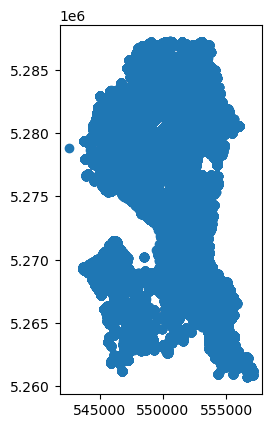

In [5]:
bikeshare_gdf.plot()

In [6]:
seattle_city = "2016_seattle_city"
seattle_cra = "2016_seattle_cra"
seattle_neighborhoods = "2016_seattle_neighborhoods"
seattle_pumas = "2016_seattle_pumas"

seattle_geojson_url = f'https://raw.githubusercontent.com/seattleflu/seattle-geojson/master/seattle_geojsons/{seattle_neighborhoods}.geojson'

seattle_gdf = gpd.read_file(
    seattle_geojson_url,
    engine='pyogrio'
)
seattle_gdf.to_crs("EPSG:32610", inplace=True)
seattle_gdf.head()

,STATEFP,COUNTYF,TRACTCE,AFFGEOI,GEOID,NAME,LSAD,ALAND,AWATER,rowID,CRA_NAM,NEIGHBO,PUMA5CE,geometry
0,1400000US53033003000,033,003000,1400000US53033003000,53033003000,30,CT,1493249,0,1,Whittier Heights,Ballard,11601,"MULTIPOLYGON (((547579.459 5280078.567, 547582..."
1,1400000US53033005801,033,005801,1400000US53033005801,53033005801,58.01,CT,1814668,264894,2,Interbay,Magnolia/Queen Anne,11603,"MULTIPOLYGON (((548725.85 5274777.605, 549014...."
2,1400000US53033007600,033,007600,1400000US53033007600,53033007600,76,CT,571879,0,3,Miller Park,East,11604,"MULTIPOLYGON (((553695.251 5277372.334, 555808..."
3,1400000US53033000200,033,000200,1400000US53033000200,53033000200,2,CT,3286278,0,4,Olympic Hills/Victory Heights,North,11602,"MULTIPOLYGON (((553198.418 5283732.444, 553215..."
4,1400000US53033009300,033,009300,1400000US53033009300,53033009300,93,CT,9429073,719985,5,Duwamish/SODO,Greater Duwamish,11605,"MULTIPOLYGON (((554320.64 5264487.451, 554340...."


In [7]:
alt_neighborhood_boundaries = "https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/refs/heads/master/data/neighborhoods.geojson"

seattle_alt_gdf = gpd.read_file(
    alt_neighborhood_boundaries,
    engine='pyogrio'
)
# print(seattle_es_gdf.crs)
seattle_alt_gdf.to_crs("EPSG:32610", inplace=True)

seattle_alt_gdf = seattle_alt_gdf.clip(seattle_gdf)
seattle_alt_gdf.head()

,id,city,county,nhood,nested,area,name,geometry
111,Tukwila::,Tukwila,King,None,None,2.684706e+08,Tukwila,GEOMETRYCOLLECTION (POLYGON ((553437.088 52620...
151,Renton:West Hill:,Renton,King,West Hill,None,9.561779e+07,West Hill,"MULTIPOLYGON (((555763.358 5260509.267, 555763..."
45,Seattle:Rainier Valley:Rainier View,Seattle,King,Rainier Valley,Rainier View,1.824857e+07,Rainier View,"POLYGON ((556666.291 5262081.04, 556685.386 52..."
44,Seattle:Rainier Valley:Rainier Beach,Seattle,King,Rainier Valley,Rainier Beach,3.312824e+07,Rainier Beach,"POLYGON ((554278.034 5263255.646, 554286.997 5..."
43,Seattle:Rainier Valley:Dunlap,Seattle,King,Rainier Valley,Dunlap,1.960160e+07,Dunlap,"POLYGON ((554257.714 5264485.968, 554417.904 5..."


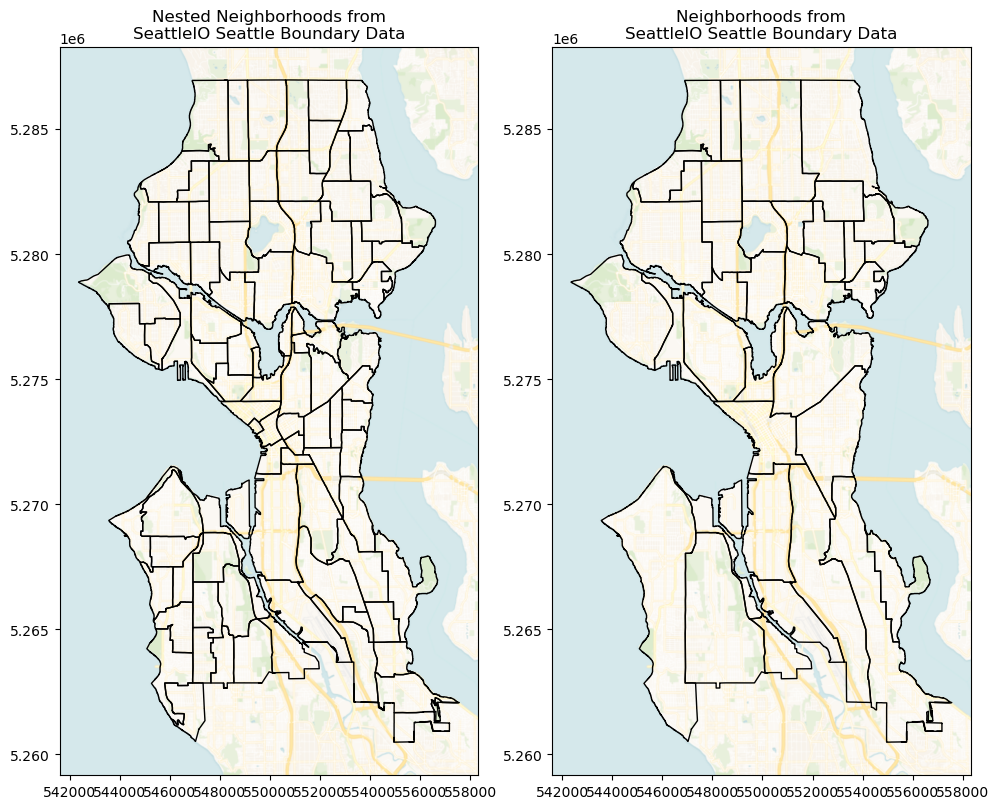

In [8]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121)
seattle_alt_gdf.plot(ax=ax, facecolor="None", edgecolor='black')
ctx.add_basemap(ax, crs=seattle_gdf.crs, source=ctx.providers.CartoDB.VoyagerNoLabels, attribution=False)
ax.set_title("Nested Neighborhoods from\nSeattleIO Seattle Boundary Data")

ax1 = fig.add_subplot(122)
seattle_alt_gdf[["nhood", "area", "geometry"]].dissolve(by="nhood", aggfunc="sum").plot(ax=ax1, facecolor="None", edgecolor='black')
ctx.add_basemap(ax1, crs=seattle_gdf.crs, source=ctx.providers.CartoDB.VoyagerNoLabels, attribution=False)
ax1.set_title("Neighborhoods from\nSeattleIO Seattle Boundary Data")

plt.tight_layout()
plt.show()

In [12]:
from matplotlib.axes import Axes
from typing import Optional

time_of_system_query = "ALL_TIME"


def plot_lime_bikeshare(
    neighborhood: Optional[str] = None,
    ax: Optional[Axes] = None
) -> None:
    """Plot the Lime Bike and Scooter Share in Seattle."""
    if neighborhood:
        if neighborhood not in seattle_alt_gdf.nhood.unique():
            raise ValueError(f"Neighborhood '{neighborhood}' not found in Seattle boundary data.")
        else:
            seattle_alt_filtered_gdf = seattle_alt_gdf[seattle_alt_gdf.nhood == neighborhood]
            markersize = 30
            linwidth = 5
            alpha = 1
            title = f"{neighborhood} Lime Bike and Scooter Share\n(as of {time_of_system_query})"
    else:
        seattle_alt_filtered_gdf = seattle_alt_gdf
        markersize = 10
        linwidth = 1
        alpha = 0.5
        title = f"Seattle Lime Bike and Scooter Share\n(as of {time_of_system_query})"

    bikeshare_filtered_gdf = bikeshare_gdf.clip(seattle_alt_filtered_gdf)
    
    if ax is None:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)

    seattle_alt_filtered_gdf[["nhood", "area", "geometry"]].dissolve(by="nhood", aggfunc="sum").plot(ax=ax, facecolor="None", edgecolor='black', linewidth=linwidth)
    ctx.add_basemap(ax, crs=seattle_gdf.crs, source=ctx.providers.CartoDB.VoyagerNoLabels, attribution=False)
    bikeshare_filtered_gdf.plot(ax=ax, markersize=markersize, column="vehicle_type", legend=True, alpha=alpha, zorder=2)
    ax.set_xlim(seattle_alt_filtered_gdf.total_bounds[[0, 2]])
    ax.set_ylim(seattle_alt_filtered_gdf.total_bounds[[1, 3]])
    ax.set_title(title)
    ax.set_aspect(1)
    ax.axis("off")


In [13]:
seattle_alt_gdf.nhood.unique()

array([None, 'West Hill', 'Rainier Valley', 'Beacon Hill', 'Lake City',
       'Delridge', 'South Park', 'Georgetown', 'West Seattle',
       'Seward Park', 'Central Area', 'Capitol Hill',
       'Industrial District', 'Harbor Island', 'Queen Anne', 'Magnolia',
       'Interbay', 'Downtown', 'Cascade', 'Wallingford', 'Green Lake',
       'Roosevelt', 'Northgate', 'Fremont', 'Ballard', 'Phinney Ridge',
       'Laurelhurst', 'University District', 'Windermere', 'Bryant',
       'Ravenna', 'Sand Point', 'View Ridge', 'Wedgwood', 'Greenwood',
       'Crown Hill', 'North Beach - Blue Ridge', 'Broadview',
       'Bitter Lake'], dtype=object)

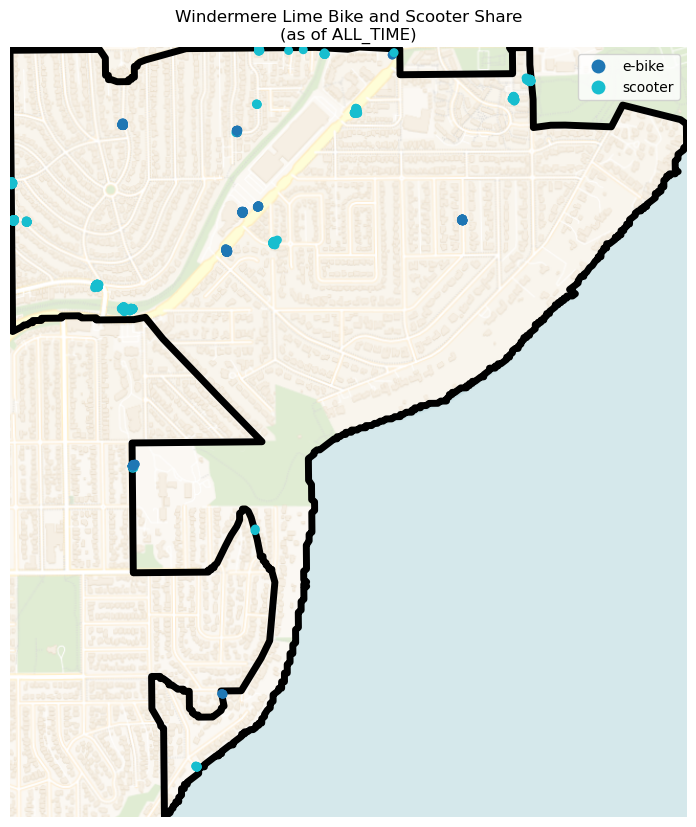

In [14]:
plot_lime_bikeshare(neighborhood="Windermere")

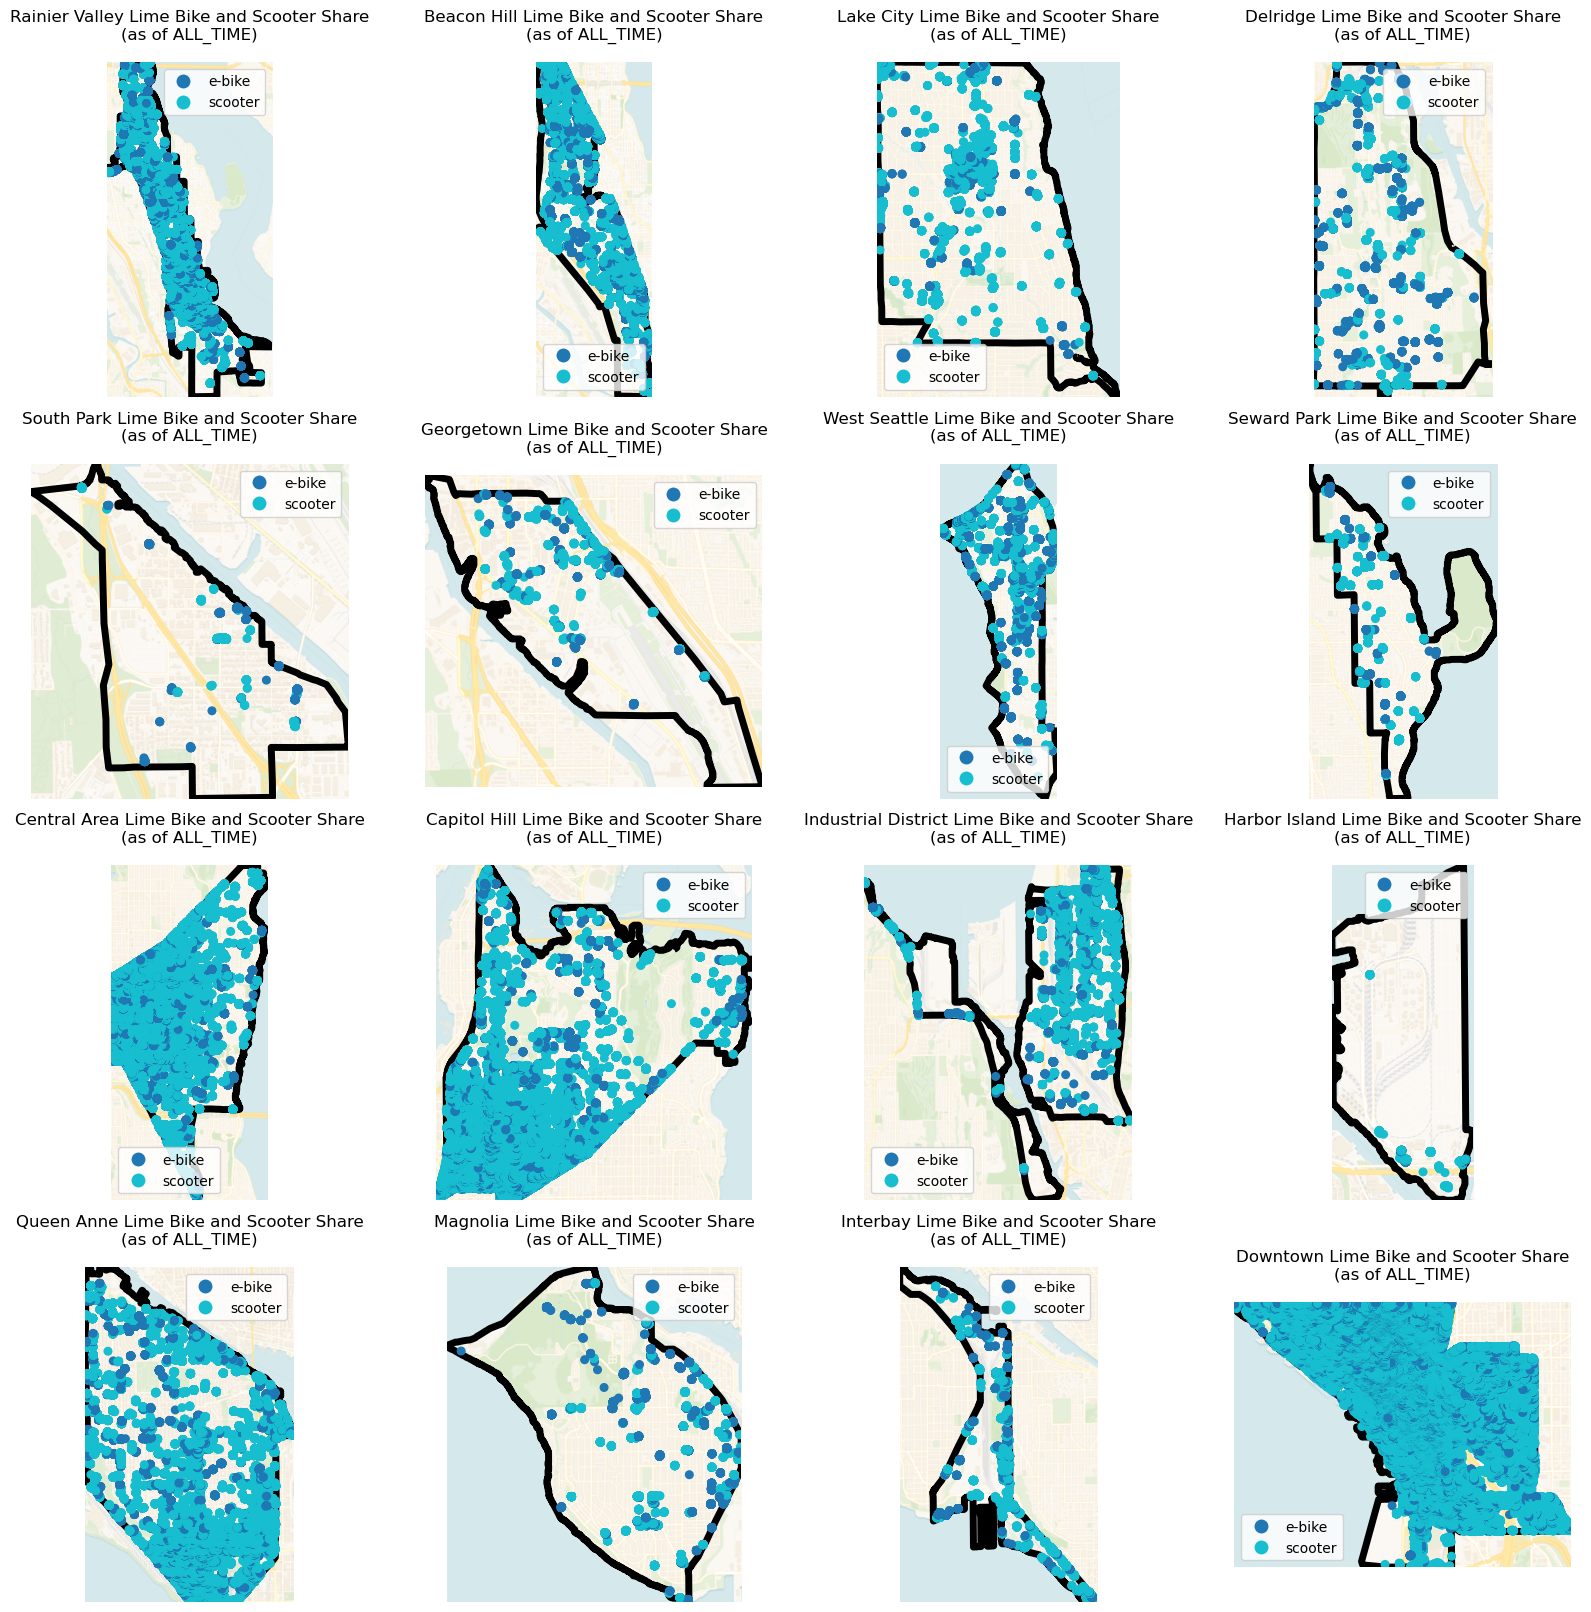

In [15]:
fig, axs = plt.subplots(4,4)
fig.set_size_inches(20, 20)

for ax, nhood in zip(axs.flatten(), seattle_alt_gdf.nhood.unique()[2:18]):
    plot_lime_bikeshare(neighborhood=nhood, ax=ax)

plt.show()

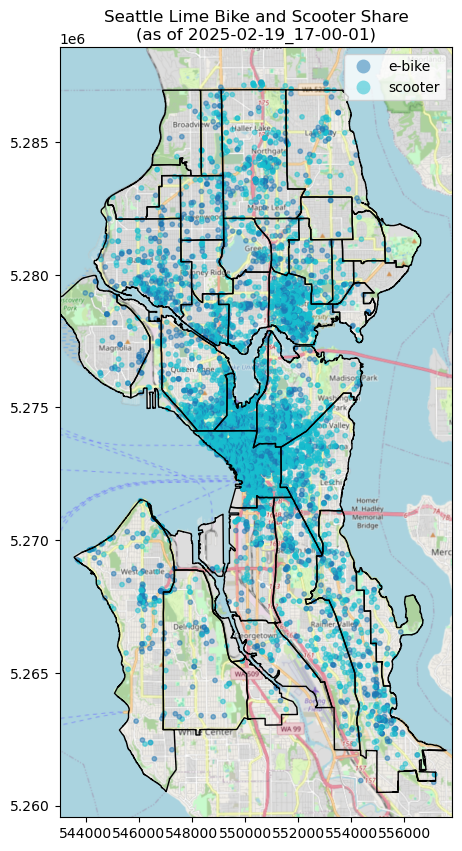

In [12]:
fig = plt.figure(figsize=(10, 10)) #, dpi=320)
ax = fig.add_subplot(111)

bikeshare_gdf.plot(ax=ax, markersize=10, column="vehicle_type", legend=True, alpha=0.5)
ctx.add_basemap(ax, crs=seattle_gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik, attribution=False)
# ctx.add_basemap(ax, crs=seattle_gdf.crs, source=ctx.providers.CartoDB.Positron, attribution=False)
seattle_alt_gdf[["nhood", "area", "geometry"]].dissolve(by="nhood", aggfunc="sum").plot(ax=ax, facecolor="None", edgecolor='black')

ax.set_title(f"Seattle Lime Bike and Scooter Share\n(as of {time_of_system_query})")
# plt.savefig(f"visuals/seattle_lime_bikeshare_{time_of_system_query.strftime('%Y-%m-%d_%H-%M-%S')}.png", dpi=320)
plt.show()